![pancakespilesPythonlists.png](http://ungrid.unal.edu.co/gjhernandezp/algorithms/pancakes/pancakespilesPythonlistsonespatula.png)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pydot
from collections import defaultdict 
from IPython.display import Image, display

In [3]:
def lstr(p):
        return ''.join([str(elem)  for elem in p])

In [4]:
def create_network(n):
  # Create dictionaries graph,visited and pydot graph G
  graph = defaultdict()

  # Create queue to create the graph using a BFS
  queue = []

  # Appending root(sorted permutation)
  queue.append(lstr([i + 1 for i in range(n)]))

  while queue:
    # Dequeue a vertex from queue 
    s = queue.pop(0)
    graph[lstr(s)]=[]

    # Get all adjacent vertices of the
    # dequeued vertex s. If a adjacent
    # has not been visited, then mark it
    # visited and enqueue it
    for i in range(len(s)-1):
      d = s[i+1::-1] + s[i+2:]
      graph[lstr(s)].append(lstr(d))

      if not(lstr(d) in graph.keys()):
        queue.append(d) 

  return graph

In [5]:
def create_network_and_figure(n):
  # Create dictionaries graph,visited and pydot graph G
  graph = defaultdict()
  G = pydot.Dot(graph_type="graph")

  # Create queue to create the graph using a BFS
  queue = []

  # Appending root(sorted permutation)
  queue.append([i + 1 for i in range(n)])
  node = pydot.Node(lstr([i + 1 for i in range(n)]), style="filled", fillcolor="green")
  G.add_node(node)

  while queue:
    # Dequeue a vertex from queue 
    s = queue.pop(0)
    graph[lstr(s)]=[]

    flag = False
    for i in range(len(s)-1):
      d = s[i+1::-1] + s[i+2:]
      if(d == sorted(d)):
        flag = True
        break
    if flag:
      node = pydot.Node(lstr(s),style="filled", fillcolor="yellow")
    else: 
      node = pydot.Node(lstr(s))

    G.add_node(node)

    # Get all adjacent vertices of the
    # dequeued vertex s. If a adjacent
    # has not been visited, then mark it
    # visited and enqueue it
    for i in range(len(s)-1):
      d = s[i+1::-1] + s[i+2:]
      graph[lstr(s)].append(lstr(d))

      if (d != sorted(d)):
        node = pydot.Node(lstr(d))
      else:
        node = pydot.Node(lstr(d), style="filled", fillcolor="green") # first sorted green

      if not(lstr(d) in graph.keys()):
        G.add_node(node)
        edge = pydot.Edge(lstr(s),lstr(d))
        G.add_edge(edge)
        queue.append(d)

  return graph, G

In [6]:
def compute_p_n(graph, n, print_levels=False):
  # Create dictionaries graph,visited and pydot graph G
  visited = defaultdict()
  p = 0

  # Create a queue for BFS
  queue = []
  # Mark the source node as visited and enqueue it
  queue.append([lstr([i + 1 for i in range(n)]), 0])
  visited[lstr([i + 1 for i in range(n)])] = True

  while queue:
    # Dequeue a vertex from queue 
    actual_node = queue.pop(0)
    s = actual_node[0]
    level = actual_node[1]
    if print_levels:
      with open('drive/MyDrive/Colab Notebooks/Pancakes.txt', 'a+') as writefile:
        writefile.write("Actual level: " + str(level) + " for n = " + str(n) + "\n")

    # Get all adjacent vertices of the
    # dequeued vertex s. If a adjacent
    # has not been visited, then mark it
    # visited and enqueue it
    for d in graph[s]:
      if not d in visited.keys():
        queue.append([d, level + 1])
        visited[d] = True
        p = max(p, level + 1)

  return p

# Punto 1

P( 2 ):  1


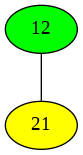

P( 3 ):  3


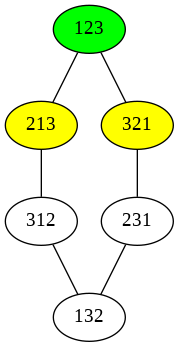

P( 4 ):  4


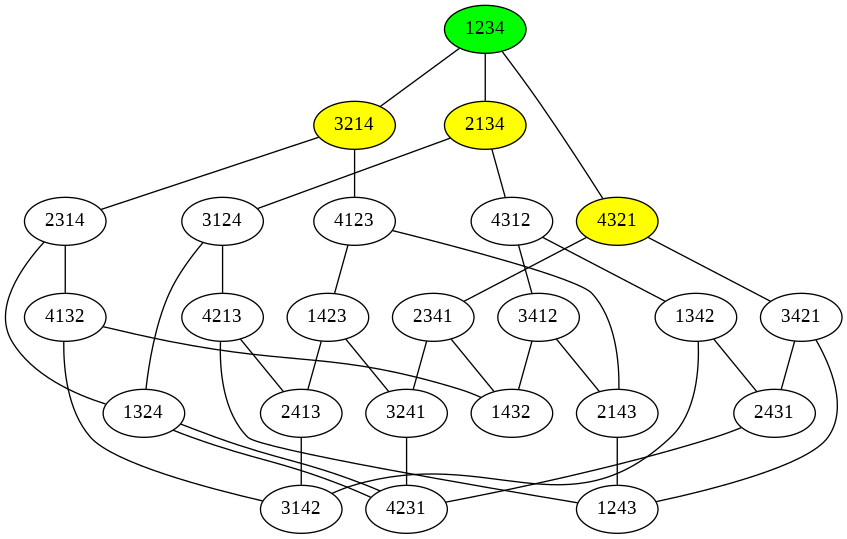

In [166]:
for n in range(2,5):
  graph, G = create_network_and_figure(n)
  print("P(", n, "): ", compute_p_n(graph, n))
  display_graph(G)

# Punto 2

In [8]:
for n in range(5,20):
  graph = create_network(n)
  p = compute_p_n(graph, n, print_levels = True)
  output_str = "P(" +  str(n) + "): " + str(p) + "\n"
  with open('drive/MyDrive/Colab Notebooks/Pancakes.txt', 'a+') as writefile:
    writefile.write(output_str)
  print(output_str, end="")

P(5): 5
P(6): 7
P(7): 8
P(8): 9
P(9): 10


KeyboardInterrupt: ignored

# Punto 3

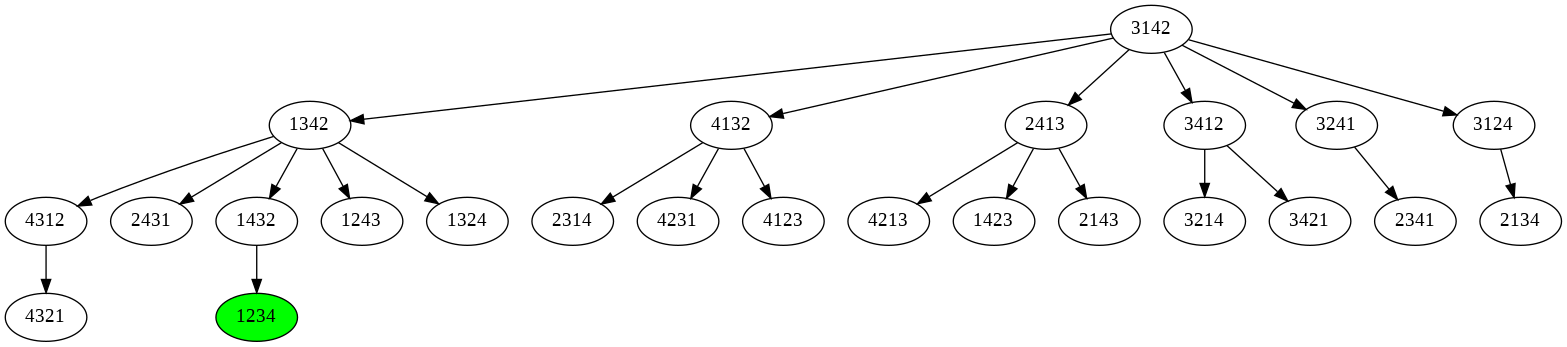

In [167]:
def double_spatula_pancakes_tree(s): 

  # Create dictionaries graph,visited and pydot graph G
  visited = defaultdict()
  G = pydot.Dot(graph_type="digraph")
  
  # Create a queue for BFS 
  queue = [] 

  # Mark the source node as visited and enqueue it 
  queue.append(s) 
  visited[lstr(s)] = True

  while queue: 

    # Dequeue a vertex from queue 
    s = queue.pop(0)
    node = pydot.Node(lstr(s))
    G.add_node(node)
    
    # Get all adjacent vertices of the 
    # dequeued vertex s. If a adjacent 
    # has not been visited, then mark it 
    # visited and enqueue it 
    if(s != sorted(s)):
      for i in range(len(s)-1):
        for j in range(i+1,len(s)):
          if i!=0:
            d = s[:i] + s[j:i-1:-1] + s[j+1:]  
          else:
            d = s[j::-1] + s[j+1:]
          if (d != s) and not(lstr(d) in visited.keys()):
          
            if(d != sorted(d)):
              node = pydot.Node(lstr(d))
            else:
              node = pydot.Node(lstr(d),style="filled", fillcolor="green") # first sorted green
            
            G.add_node(node)
            edge = pydot.Edge(lstr(s),lstr(d))
            G.add_edge(edge)
            queue.append(d) 
            visited[lstr(d)] = True
        
  # Dsplay the pydot graph G
  im = Image(G.create_png())
  display(im)
double_spatula_pancakes_tree([3,1,4,2])